# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
# mostrar las primeras 5 filas de plans
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:

# cantidad de nulos para users
print(users.isna().sum()) # Cantidad de valores nulos)
print(users.isna().mean()) # Proporción de valores nulos)


user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [11]:
# cantidad de nulos para usage
print(usage.isna().sum()) # Cantidad de valores nulos)
print(usage.isna().mean()) # Proporción de valores nulos)

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

Dentro de users:
11.72% de usuarios que no tienen ciudad registrada, esto representa un problema menor. 
88.35% de usuarios no tienen churn date, representan clientes activos que nunca se han dado de baja del servicio, esto se supone que es completamente normal.
Usage:
55.19% registros no tienen duración registrada.
44.74% registros no tienen longitud registrada.
esto es normal porque los mensajes no tienen duracion y las llamadas no tienen duración, asi que no representa un problema.

Imputar city o date, ya que date tiene tan pocos valores que podrías usar la fecha promedio.
Ignorar churn_date y duration vs lenght.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


-La edad minima es -999 significa que tiene valores imposibles y es necesario crear una funcion para reemplazar por NaN.
el user_id se encuentra estable.

In [13]:
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.
- Las columnas id y user_id contienen los mismos numeros de registro.

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
print("Ciudades únicas:")
print(users['city'].value_counts())

print("\nPlanes únicos:")
print(users['plan'].value_counts())

Ciudades únicas:
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64

Planes únicos:
Basico     2595
Premium    1405
Name: plan, dtype: int64


- La columna `city` contiene 6 ciudades únicas, existen 96 registros desconocidos. 
- La columna `plan` contiene 2 planes únicos, básico y premium.

In [15]:
# explorar columna categórica de usage
usage['type'] 
print("Tipos de servicios únicos:")
print(usage['type'].unique())

print("\nFrecuencia de cada tipo:")
print(usage['type'].value_counts())

print("\nPorcentaje de uso por tipo:")
print(usage['type'].value_counts(normalize=True) * 100)

Tipos de servicios únicos:
['call' 'text']

Frecuencia de cada tipo:
text    22092
call    17908
Name: type, dtype: int64

Porcentaje de uso por tipo:
text    55.23
call    44.77
Name: type, dtype: float64


- La columna `type` tiene dos tipos de servicios: llamadas y textos.
- El servicio más utilizado por los clientes es el texto.

---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

Se encontraron valores inválidos en la columna age en mínimo había valores de -999
En ese caso usaría una función de reemplazar por NaN.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'])

In [18]:
users["reg_date"].head()

0   2022-01-01 00:00:00.000000000
1   2022-01-01 06:34:17.914478619
2   2022-01-01 13:08:35.828957239
3   2022-01-01 19:42:53.743435858
4   2022-01-02 02:17:11.657914478
Name: reg_date, dtype: datetime64[ns]

In [19]:
# Revisar cuántas veces aparece cada año
print("Distribución de registros por año:")
print(users['reg_date'].dt.year.value_counts().sort_index())

print("\nAños únicos encontrados:")
print(sorted(users['reg_date'].dt.year.unique()))

Distribución de registros por año:
2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

Años únicos encontrados:
[2022, 2023, 2024, 2026]


In [20]:
# Identificar fechas imposibles
print("Rango de fechas:")
print(f"Fecha más antigua: {users['reg_date'].min()}")
print(f"Fecha más reciente: {users['reg_date'].max()}")

# Detectar años futuros (>2024)
fechas_futuras = users[users['reg_date'].dt.year > 2024]
print(f"\nRegistros con fechas futuras (>2024): {len(fechas_futuras)}")

# Detectar años negativos o muy antiguos (ej. <1990)
fechas_antiguas = users[users['reg_date'].dt.year < 1990]
print(f"Registros con fechas muy antiguas (<1990): {len(fechas_antiguas)}")

Rango de fechas:
Fecha más antigua: 2022-01-01 00:00:00
Fecha más reciente: 2026-05-10 00:00:00

Registros con fechas futuras (>2024): 40
Registros con fechas muy antiguas (<1990): 0


En `reg_date`, existen 40 valores fuera del rango esperado

In [21]:
usage['year'] = usage['date'].dt.year
# Revisar los años presentes en `date` de usage
years_present = usage['year'].unique()
print("Años presentes en los datos:")
print(sorted(years_present))

Años presentes en los datos:
[2024.0, nan]


In [22]:
# Contar cuántos registros hay por año
year_counts = usage['year'].value_counts().sort_index()
print("\nDistribución de registros por año:")
print(year_counts)


Distribución de registros por año:
2024.0    39950
Name: year, dtype: int64


In [23]:
# Examinar la columna date correctamente
print("Información básica de la columna date:")
print("Tipo de datos:", usage['date'].dtype)
print("Cantidad de valores:", len(usage['date']))
print("Valores nulos:", usage['date'].isnull().sum())

print("\nPrimeras fechas:")
print(usage['date'].head(10))

print("\nÚltimas fechas:")
print(usage['date'].tail(10))

Información básica de la columna date:
Tipo de datos: datetime64[ns]
Cantidad de valores: 40000
Valores nulos: 50

Primeras fechas:
0   2024-01-01 00:00:00.000000000
1   2024-01-01 00:06:30.969774244
2   2024-01-01 00:13:01.939548488
3   2024-01-01 00:19:32.909322733
4   2024-01-01 00:26:03.879096977
5   2024-01-01 00:32:34.848871221
6   2024-01-01 00:39:05.818645466
7   2024-01-01 00:45:36.788419710
8   2024-01-01 00:52:07.758193954
9   2024-01-01 00:58:38.727968199
Name: date, dtype: datetime64[ns]

Últimas fechas:
39990   2024-06-29 23:01:21.272031800
39991   2024-06-29 23:07:52.241806044
39992   2024-06-29 23:14:23.211580288
39993   2024-06-29 23:20:54.181354532
39994   2024-06-29 23:27:25.151128778
39995   2024-06-29 23:33:56.120903022
39996   2024-06-29 23:40:27.090677266
39997   2024-06-29 23:46:58.060451510
39998   2024-06-29 23:53:29.030225754
39999   2024-06-30 00:00:00.000000000
Name: date, dtype: datetime64[ns]


In [24]:
# Examinar la columna date
print("=== ANÁLISIS DE LA COLUMNA DATE ===")
print("Tipo de datos:", usage['date'].dtype)
print("Cantidad total de registros:", len(usage['date']))
print("Valores únicos:", usage['date'].nunique())
print("Valores nulos:", usage['date'].isnull().sum())

=== ANÁLISIS DE LA COLUMNA DATE ===
Tipo de datos: datetime64[ns]
Cantidad total de registros: 40000
Valores únicos: 39950
Valores nulos: 50


In [25]:
print("\n=== RANGO DE FECHAS ===")
print("Fecha más antigua:", usage['date'].min())
print("Fecha más reciente:", usage['date'].max())


=== RANGO DE FECHAS ===
Fecha más antigua: 2024-01-01 00:00:00
Fecha más reciente: 2024-06-30 00:00:00


In [26]:
print("\n=== EJEMPLOS DE FECHAS ===")
print("Primeras 10 fechas:")
print(usage['date'].head(10))


=== EJEMPLOS DE FECHAS ===
Primeras 10 fechas:
0   2024-01-01 00:00:00.000000000
1   2024-01-01 00:06:30.969774244
2   2024-01-01 00:13:01.939548488
3   2024-01-01 00:19:32.909322733
4   2024-01-01 00:26:03.879096977
5   2024-01-01 00:32:34.848871221
6   2024-01-01 00:39:05.818645466
7   2024-01-01 00:45:36.788419710
8   2024-01-01 00:52:07.758193954
9   2024-01-01 00:58:38.727968199
Name: date, dtype: datetime64[ns]


En `date`:
Las fechas estan en el formato correcto.
El rango esta dentro del año 2024.
No hay fechas imposibles o fuera de rango.
El único punto que requiere atención son los 50 valores nulos que se encuentran.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?
APARECEN 50 VALORES NULOS.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [27]:
# Reemplazar -999 por la mediana de age
# Calcular mediana excluyendo -999
mediana_age = users[users['age'] != -999]['age'].median()
print(f"La mediana es: {mediana_age}")
users['age'] = users['age'].replace(-999, mediana_age)

print(f"Valores -999 restantes: {(users['age'] == -999).sum()}")
print(f"Valores nulos: {users['age'].isna().sum()}")

# Verificar cambios
users['age'].describe()

La mediana es: 48.0
Valores -999 restantes: 0
Valores nulos: 0


count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [28]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace("?", pd.NA)
# Ver cuántos valores nulos tienes ahora
print(f"Valores nulos en city: {users['city'].isna().sum()}")

# Ver los valores únicos para confirmar que ya no hay "?"
print(users['city'].value_counts(dropna=False))

Valores nulos en city: 565
Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64


In [29]:
# Crear máscara para fechas futuras
fechas_futuras = users['reg_date'] > pd.Timestamp.now()
print(f"Fechas futuras encontradas: {fechas_futuras.sum()}")

# Reemplazar fechas futuras con pd.NaT (correcto para datetime)
users.loc[fechas_futuras, 'reg_date'] = pd.NaT

# Verificar cambios
print(f"Valores nulos en reg_date después: {users['reg_date'].isna().sum()}")

Fechas futuras encontradas: 40
Valores nulos en reg_date después: 40


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [30]:
# Verificación MAR en usage (Missing At Random) para duration
duration_missing = usage['duration'].isna()
duration_by_type = pd.crosstab(usage['type'], duration_missing, margins=True)
print("Distribución de nulos en duration por type:")
print(duration_by_type)
print()

# Calcular porcentajes
duration_pct = pd.crosstab(usage['type'], duration_missing, normalize='index') * 100
print("Porcentaje de nulos en duration por type:")
print(duration_pct)

Distribución de nulos en duration por type:
duration  False   True    All
type                         
call      17908      0  17908
text         16  22076  22092
All       17924  22076  40000

Porcentaje de nulos en duration por type:
duration       False      True 
type                           
call      100.000000   0.000000
text        0.072424  99.927576


In [31]:
# Verificación MAR en usage (Missing At Random) para length
length_missing = usage['length'].isna()
length_by_type = pd.crosstab(usage['type'], length_missing, margins=True)
print("Distribución de nulos en length por type:")
print(length_by_type)
print()

# Calcular porcentajes
length_pct = pd.crosstab(usage['type'], length_missing, normalize='index') * 100
print("Porcentaje de nulos en length por type:")
print(length_pct)

Distribución de nulos en length por type:
length  False   True    All
type                       
call       12  17896  17908
text    22092      0  22092
All     22104  17896  40000

Porcentaje de nulos en length por type:
length       False      True 
type                         
call      0.067009  99.932991
text    100.000000   0.000000


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

LAS LLAMADAS TIENEN 0 VALORES NULOS EN DURACION Y 100% VALORES VÁLIDOS.
LOS MENSAJES TIENEN 99.92% VALORES NULOS EN DURACION Y 0.72% VALORES VALIDOS. 
LAS LLAMADAS TIENEN 99.93% VALORES NULOS EN LONGITUD Y 06.7% VALORES VÁLIDOS.
LOS MENSAJES TIENEN 0% VALORES NULOS EN LONGITUD Y 100% VALORES VÁLIDOS.

ESTOS VALORES SON NORMALES YA QUE LAS LLAMADAS NO TIENEN LONGITUD Y LOS MENSAJES NO TIENEN DURACION.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [32]:
# Ver las columnas de tu DataFrame usage
print("Columnas disponibles:")
print(usage.columns.tolist())
print("\nPrimeras filas para entender la estructura:")
print(usage.head())

Columnas disponibles:
['id', 'user_id', 'type', 'date', 'duration', 'length', 'year']

Primeras filas para entender la estructura:
   id  user_id  type                          date  duration  length    year
0   1    10332  call 2024-01-01 00:00:00.000000000      0.09     NaN  2024.0
1   2    11458  text 2024-01-01 00:06:30.969774244       NaN    39.0  2024.0
2   3    11777  text 2024-01-01 00:13:01.939548488       NaN    36.0  2024.0
3   4    10682  call 2024-01-01 00:19:32.909322733      1.53     NaN  2024.0
4   5    12742  call 2024-01-01 00:26:03.879096977      4.84     NaN  2024.0


In [33]:
# Ver qué tipos de comunicación tienes
print("Tipos de comunicación únicos:")
print(usage['type'].unique())
print("\nConteo por tipo:")
print(usage['type'].value_counts())

Tipos de comunicación únicos:
['call' 'text']

Conteo por tipo:
text    22092
call    17908
Name: type, dtype: int64


In [34]:
# Agrupar por user_id y crear las métricas
tabla_agregada = usage.groupby("user_id").agg(
        cant_mensajes=("length", "count"),
        cant_llamadas=("duration", "count"),
        cant_minutos_llamada=("duration", "sum")
    ).reset_index()   
    
print("Tabla inicial:")
print(tabla_agregada.head())

Tabla inicial:
   user_id  cant_mensajes  cant_llamadas  cant_minutos_llamada
0    10000              7              3                 23.70
1    10001              5             10                 33.18
2    10002              5              2                 10.74
3    10003             11              3                  8.99
4    10004              4              3                  8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [35]:
# Resumen estadístico de las columnas numéricas
print("Estadísticas descriptivas de columnas numéricas:")
print(usage[['duration', 'length', 'user_id']].describe())

Estadísticas descriptivas de columnas numéricas:
           duration        length       user_id
count  17924.000000  22104.000000  40000.000000
mean       5.202237     52.127398  12002.405975
std        6.842701     56.611183   1157.279564
min        0.000000      0.000000  10000.000000
25%        1.437500     37.000000  10996.000000
50%        3.500000     50.000000  12013.000000
75%        6.990000     64.000000  13005.000000
max      120.000000   1490.000000  13999.000000


In [36]:
# Distribución porcentual del tipo de plan
distribucion_porcentual = usage['type'].value_counts(normalize=True) * 100

print("Distribución porcentual por tipo:")
print(distribucion_porcentual)
print(f"\nTotal: {distribucion_porcentual.sum():.1f}%")

Distribución porcentual por tipo:
text    55.23
call    44.77
Name: type, dtype: float64

Total: 100.0%


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

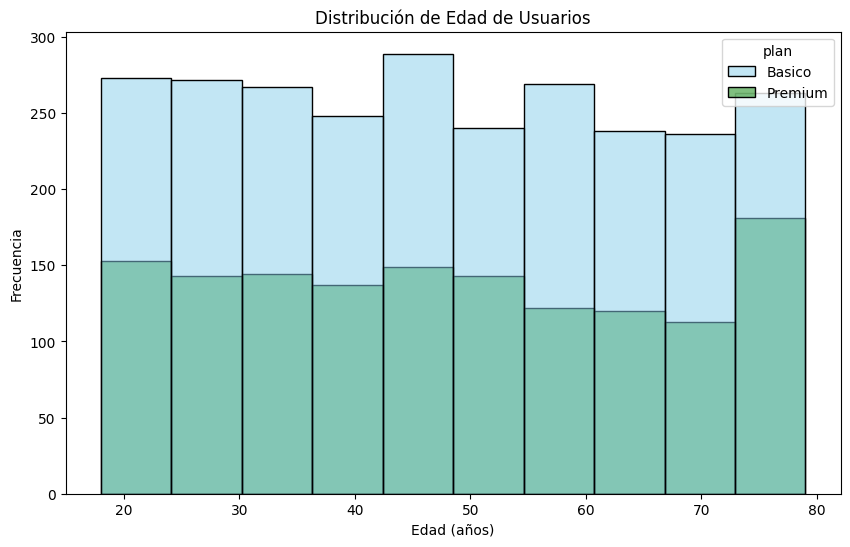

In [37]:
# Histograma para visualizar la edad (age)
plt.figure(figsize=(10, 6))
sns.histplot(data=users, x='age', bins=10, hue="plan", palette=["skyblue","green"])
plt.title('Distribución de Edad de Usuarios')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Distribución: La edad no está sesgada a ninguna dirección, se encuentra distribuida uniformemente, aunque predomina la edad entre 40 y 50 años y existe también un pico en la edad entre 70 y 80.

In [38]:

# Filtrar solo los mensajes
messages_data = usage[usage['type'] == 'text']  # o 'sms', según lo que aparezca
print(f"Total de mensajes: {len(messages_data)}")


Total de mensajes: 22092


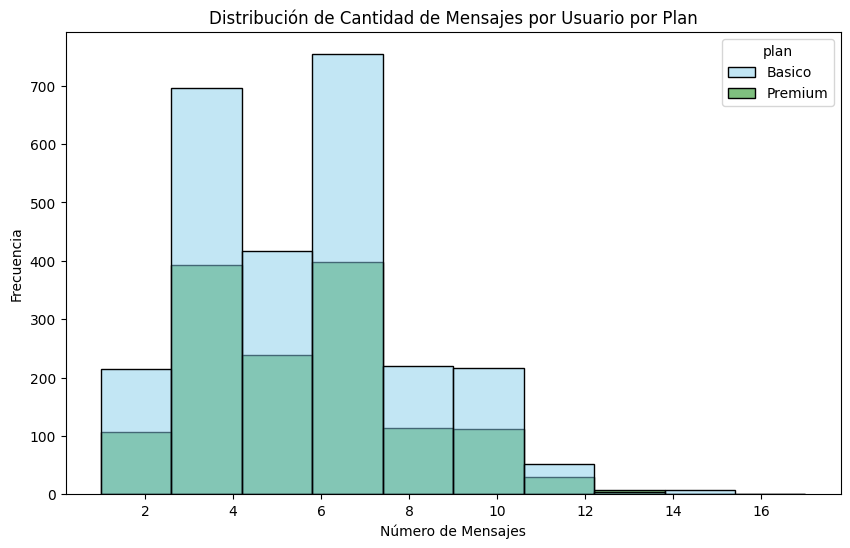

In [39]:
# Contar mensajes por usuario
messages_per_user = messages_data.groupby('user_id').size().reset_index(name='num_messages')

# Unir con información de planes 
messages_with_plan = messages_per_user.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Histograma de mensajes por usuario
plt.figure(figsize=(10, 6))
sns.histplot(data=messages_with_plan, x='num_messages', hue='plan', bins=10, palette=["skyblue", "green"])
plt.title('Distribución de Cantidad de Mensajes por Usuario por Plan')
plt.xlabel('Número de Mensajes')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- La distribución esta sesgada a la derecha, eso significa que hay menor número de mensajes y se muestra que no existe relación entre la frecuencia y el tipo de plan ya que parece que ningún plan predomina, los dos tienen la misma distribución. 

In [40]:
# Para obtener solo las llamadas
calls_data = usage[usage['type'] == 'call']

# Para obtener solo los mensajes de texto
texts_data = usage[usage['type'] == 'text']


In [41]:
print("Forma de calls_data:", calls_data.shape)
print("Primeras filas de calls_data:")
print(calls_data.head())

Forma de calls_data: (17908, 7)
Primeras filas de calls_data:
   id  user_id  type                          date  duration  length    year
0   1    10332  call 2024-01-01 00:00:00.000000000      0.09     NaN  2024.0
3   4    10682  call 2024-01-01 00:19:32.909322733      1.53     NaN  2024.0
4   5    12742  call 2024-01-01 00:26:03.879096977      4.84     NaN  2024.0
5   6    10473  call 2024-01-01 00:32:34.848871221      4.68     NaN  2024.0
6   7    12856  call 2024-01-01 00:39:05.818645466      3.27     NaN  2024.0


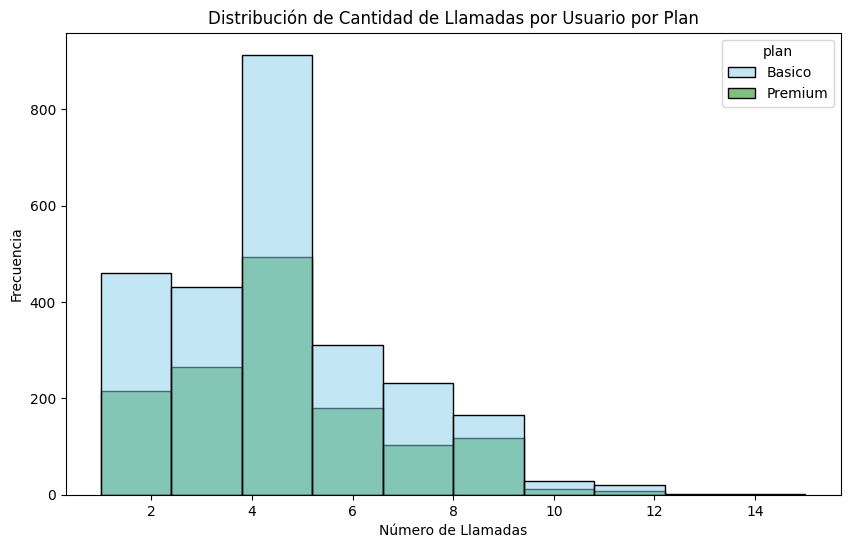

In [42]:
# Contar llamadas por usuario
calls_per_user = calls_data.groupby('user_id').size().reset_index(name='num_calls')

# Unir con información de planes
calls_with_plan = calls_per_user.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Histograma de llamadas por usuario
plt.figure(figsize=(10, 6))
sns.histplot(data=calls_with_plan, x='num_calls', hue='plan', bins=10, palette=["skyblue", "green"])
plt.title('Distribución de Cantidad de Llamadas por Usuario por Plan')
plt.xlabel('Número de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

In [43]:
print("Forma de calls_per_user:", calls_per_user.shape)
print("Primeras filas de calls_per_user:")
print(calls_per_user.head())
print("Estadísticas de num_calls:")
print(calls_per_user['num_calls'].describe())

Forma de calls_per_user: (3958, 2)
Primeras filas de calls_per_user:
   user_id  num_calls
0    10000          3
1    10001         10
2    10002          2
3    10003          3
4    10004          3
Estadísticas de num_calls:
count    3958.000000
mean        4.524507
std         2.106054
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        15.000000
Name: num_calls, dtype: float64


In [44]:
print("Valores únicos en la columna 'type':")
print(usage['type'].value_counts())

Valores únicos en la columna 'type':
text    22092
call    17908
Name: type, dtype: int64


In [45]:
print("Todos los valores únicos en 'type':")
print(usage['type'].unique())

Todos los valores únicos en 'type':
['call' 'text']


In [46]:
print("Llamadas encontradas:", calls_data.shape[0])
print("Mensajes encontrados:", texts_data.shape[0])

Llamadas encontradas: 17908
Mensajes encontrados: 22092


💡Insights: 
- La distribución del número de llamadas está sesgado a la derecha, tiene un pico en el número 4.
- no predomina ningún plan más que otro, los dos estan distribuidos equitativamente.

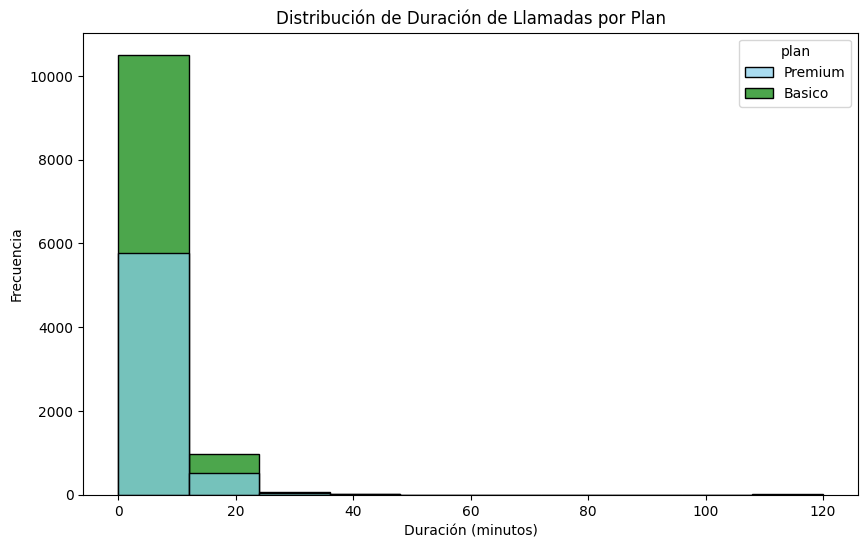

In [47]:
# Unir con información de planes
calls_with_plan = calls_data.merge(users[['user_id', 'plan']], on='user_id', how='left')
# Histograma para visualizar la cant_minutos_llamada
# Histograma comparando por plan
plt.figure(figsize=(10, 6))
sns.histplot(data=calls_with_plan, x='duration', hue='plan', bins=10, palette=['skyblue','green'], alpha=0.7)
plt.title('Distribución de Duración de Llamadas por Plan')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()


In [48]:
# Verifica el nombre correcto de tu variable (puede ser calls_data, usage_data, etc.)
print("Forma de los datos:", usage.shape)
print("Primeras filas:")
print(usage.head())
print("\nInformación de la columna:")
print(usage['duration'].describe())

Forma de los datos: (40000, 7)
Primeras filas:
   id  user_id  type                          date  duration  length    year
0   1    10332  call 2024-01-01 00:00:00.000000000      0.09     NaN  2024.0
1   2    11458  text 2024-01-01 00:06:30.969774244       NaN    39.0  2024.0
2   3    11777  text 2024-01-01 00:13:01.939548488       NaN    36.0  2024.0
3   4    10682  call 2024-01-01 00:19:32.909322733      1.53     NaN  2024.0
4   5    12742  call 2024-01-01 00:26:03.879096977      4.84     NaN  2024.0

Información de la columna:
count    17924.000000
mean         5.202237
std          6.842701
min          0.000000
25%          1.437500
50%          3.500000
75%          6.990000
max        120.000000
Name: duration, dtype: float64


💡Insights: 
- La distribución está sesgada a la derecha, la duración máxima es de 120 minutos, el promedio de duración es de 5 minutos, los clientes no muestran preferencias por ningún plan en específico.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

In [49]:
# Unir información personal con uso real
users_usage = pd.merge(users, usage, on='user_id', how='left')

In [50]:
# Unir especificando las columnas diferentes
complete_data = pd.merge(users_usage, plans, 
                        left_on='plan', 
                        right_on='plan_name', 
                        how='left')

In [51]:
complete_data = complete_data.merge(tabla_agregada,
                        on='user_id',  
                        how='left')

In [52]:
complete_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,type,...,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,6274.0,text,...,100,5,100,12,1.2,0.08,0.1,7.0,3.0,23.7
1,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,11903.0,call,...,100,5,100,12,1.2,0.08,0.1,7.0,3.0,23.7
2,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,16251.0,text,...,100,5,100,12,1.2,0.08,0.1,7.0,3.0,23.7
3,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,16549.0,call,...,100,5,100,12,1.2,0.08,0.1,7.0,3.0,23.7
4,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,22139.0,call,...,100,5,100,12,1.2,0.08,0.1,7.0,3.0,23.7


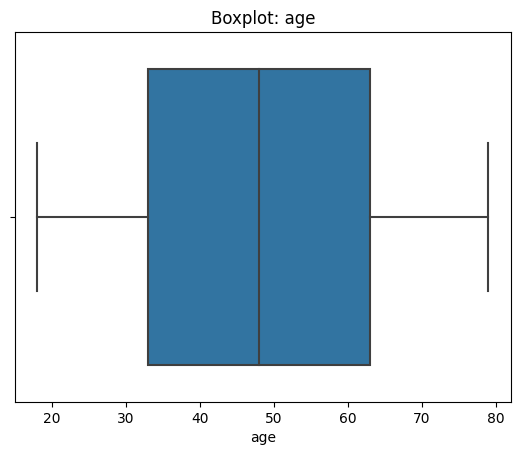

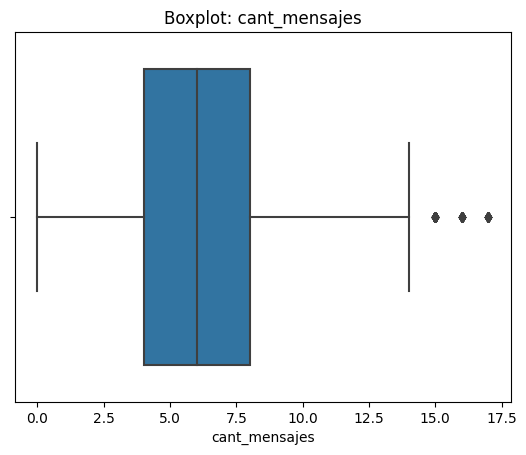

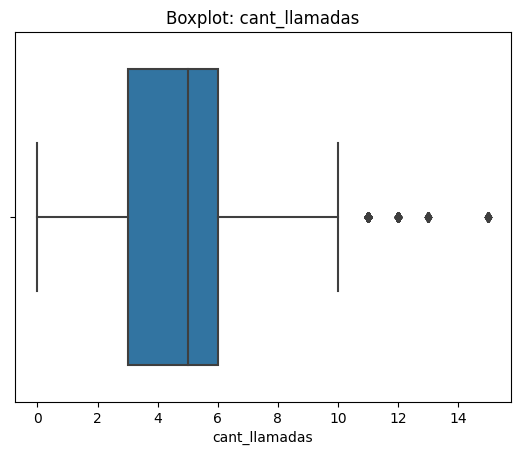

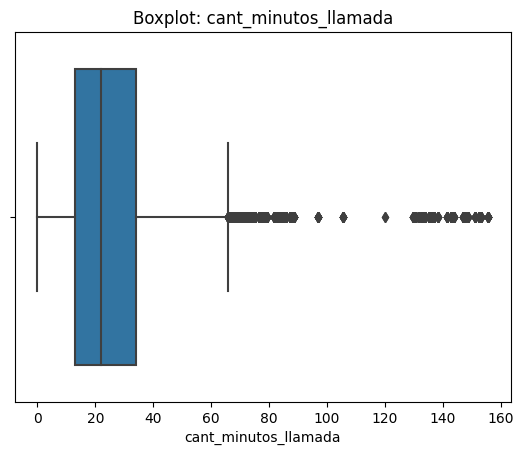

In [53]:
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
for col in columnas_numericas:
    sns.boxplot(data=complete_data, x=col)
    plt.title(f'Boxplot: {col}')
    plt.show()

💡Insights: 
- Age: No presenta ningún outlier, se muestra estable. 
- cant_mensajes: Se muestra segado hacia la derecha y presenta una cantidad no representativa de outliers a partir de los 14 mensajes.
- cant_llamadas: A partir de las 10 llamadas según el boxplot se empiezan a presentar outliers.
- cant_minutos_llamada: Se empiezan a presentar valores atípicos según el boxplot a partir de los 60 minutos.

In [54]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']



In [55]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
complete_data[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,40000.000000,40000.000000,40000.000000
mean,6.085050,4.943400,25.619338
std,2.421232,2.204488,18.683035
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,12.930000
50%,6.000000,5.000000,22.050000
75%,8.000000,6.000000,34.060000
max,17.000000,15.000000,155.690000


In [56]:
iqr_mensajes = 8 - 4 
max_mensajes = 8 + 1.5 * iqr_mensajes
min_mensajes = 4 - 1.5 * iqr_mensajes
print (max_mensajes)
print(min_mensajes)

14.0
-2.0


In [57]:
iqr_llamadas = 6 - 3
max_llamadas = 6 + 1.5 * iqr_llamadas
min_llamadas = 3 - 1.5 * iqr_llamadas
print (max_llamadas)
print (min_llamadas)

10.5
-1.5


In [58]:
iqr_minutos_llamada = 34.06 - 12.93
max_minutos_llamada = 34.06 + 1.5 * iqr_minutos_llamada
min_minutos_llamada = 12.93 - 1.5 * iqr_minutos_llamada
print (max_llamadas)
print (min_llamadas)

10.5
-1.5


💡Insights: 
- cant_mensajes: en este caso únicamente se presentan 3 valores sobre el nivel normal, asi que no representa un gran problema, no es necesario eliminar los outliers.
- cant_llamadas: En este caso se presentan muy pocos outliers, así que como el caso anterior, no es necesario eliminar los outliers.
- cant_minutos_llamada: Aquí se presentan valores atípicos que si son muy representativos, se necesita tomar acción y eliminarlos para que nuestro análisis no se vea afectado.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [65]:
def clasificar_uso (cant_llamadas, cant_mensajes):

    if cant_llamadas < 5 and cant_mensajes < 5:
        prioridad = "Bajo uso"
    elif cant_llamadas < 10 and cant_mensajes < 10:
        prioridad = "Uso medio"
    else: prioridad = "Alto uso"
    

    return prioridad


In [74]:
# Crear columna grupo_uso
complete_data['grupo_uso'] = complete_data.apply(
    lambda fila: clasificar_uso (fila['cant_minutos_llamada'], fila['cant_mensajes']), axis=1
)

In [76]:
complete_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,type,...,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,6274.0,text,...,5,100,12,1.2,0.08,0.1,7.0,3.0,23.7,Alto uso
1,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,11903.0,call,...,5,100,12,1.2,0.08,0.1,7.0,3.0,23.7,Alto uso
2,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,16251.0,text,...,5,100,12,1.2,0.08,0.1,7.0,3.0,23.7,Alto uso
3,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,16549.0,call,...,5,100,12,1.2,0.08,0.1,7.0,3.0,23.7,Alto uso
4,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,22139.0,call,...,5,100,12,1.2,0.08,0.1,7.0,3.0,23.7,Alto uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [86]:
# Crear columna grupo_edad
def clasificar_edad (age):
    if age < 30: 
        categoria = 'Joven'
    elif age < 60:
        categoria = 'Adulto'
    else: 
        categoria = 'Adulto Mayor'
    return categoria


In [87]:
complete_data['grupo_edad'] = complete_data.apply(
    lambda fila: clasificar_edad (fila['age']), axis=1
)

In [88]:
complete_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,type,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,6274.0,text,...,100,12,1.2,0.08,0.1,7.0,3.0,23.7,Alto uso,Adulto
1,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,11903.0,call,...,100,12,1.2,0.08,0.1,7.0,3.0,23.7,Alto uso,Adulto
2,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,16251.0,text,...,100,12,1.2,0.08,0.1,7.0,3.0,23.7,Alto uso,Adulto
3,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,16549.0,call,...,100,12,1.2,0.08,0.1,7.0,3.0,23.7,Alto uso,Adulto
4,10000,Carlos,Garcia,38.0,Medellín,2022-01-01,Basico,NaN,22139.0,call,...,100,12,1.2,0.08,0.1,7.0,3.0,23.7,Alto uso,Adulto


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

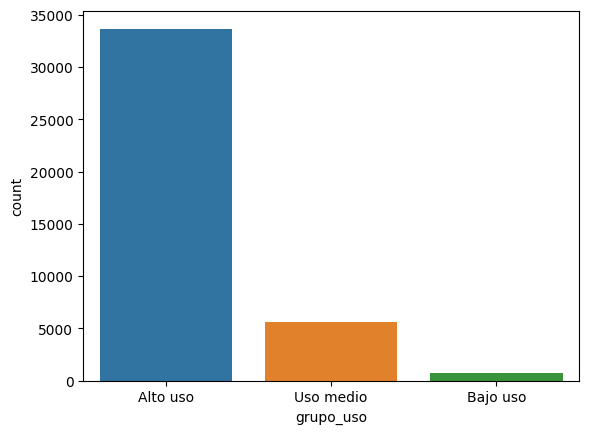

In [89]:
# Visualización de los segmentos por uso
sns.countplot(data = complete_data, x='grupo_uso')

plt.show()

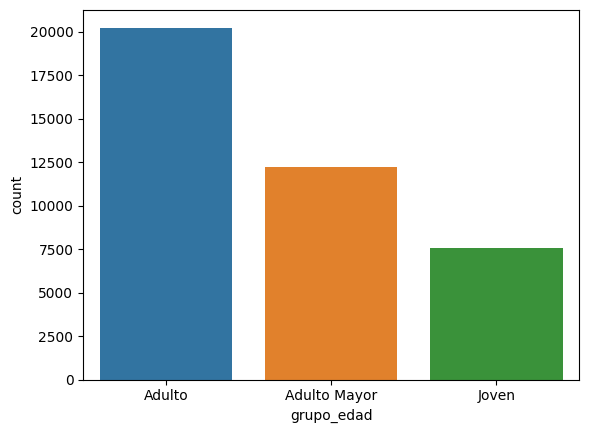

In [91]:
# Visualización de los segmentos por edad
sns.countplot(data = complete_data, x='grupo_edad')

plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Se presentaron outliers significativos en cant_minutos_llamada que afectan el analisis de datos y es por eso que se necesitan eliminar.

🔍 **Segmentos por Edad**
- La tendencia en edad es el Adulto, la más baja es Joven, se recomienda invertir más en mercadotecnia para el segmento jóvenes y así diversificar el mercado.


📊 **Segmentos por Nivel de Uso**
- Existe un alto uso de llamadas y mensajes, esto sugiere que tenemos un buen nivel de consumo de los usuarios y no existe peligro de baja demanda.


➡️ Esto sugiere que ...


💡 **Recomendaciones**
- se recomienda enfocarse en invertir en el segmento "Jóvenes" para cubrir mayor mercado.
- Añadir un nuevo plan enfocado en jóvenes con mayor cobertura.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`